In [ ]:
#Stock prices calculation below

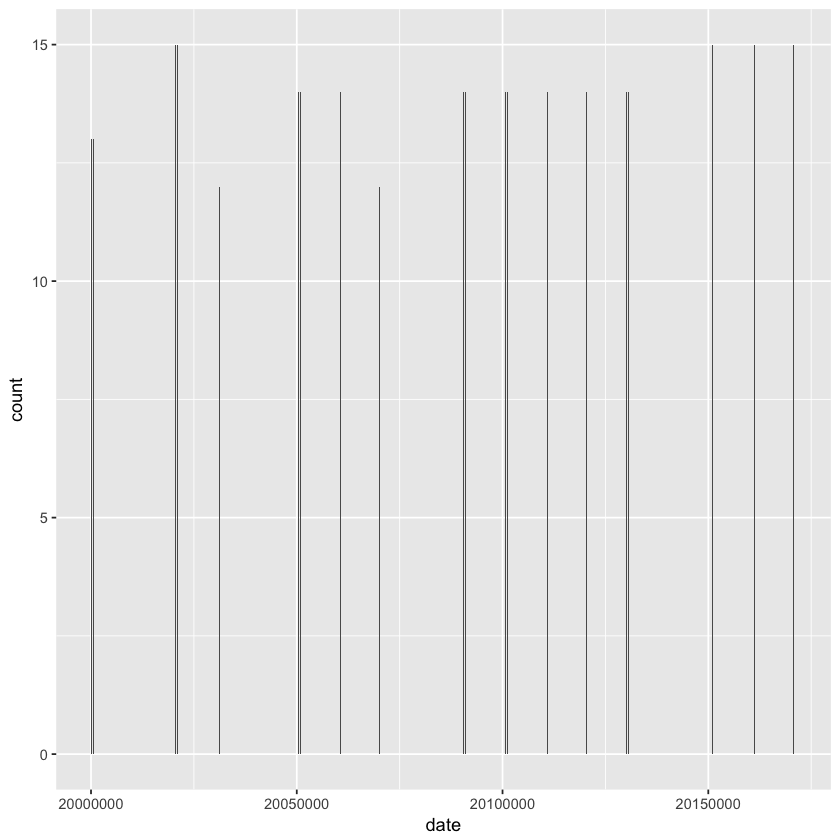

In [27]:
library(readxl)
library(reshape2)
library(ggplot2)

#name vectors

usa_region <- c("BANK OF NEW YORK MELLON CORP", "CITIGROUP INC", "GOLDMAN SACHS GROUP INC", 
                "MORGAN STANLEY", "WELLS FARGO & CO")
europeasia_region <- c("BNP PARIBAS", "DBS GROUP HOLDINGS LTD", "DEUTSCHE BANK AG", "HSBC HLDGS PLC", 
                   "ING GROEP NV", "MITSUBISHI UFJ FINANCIAL GRP", "SHINHAN FINANCIAL GROUP LTD", 
                   "SUMITOMO MITSUI FINANCIAL GR", "UBS GROUP AG", "UNITED OVERSEAS BANK LTD")

# Import data to R

share_data_USA <- read_excel("/Users/gustaf/Documents/GitHub/Programming-with-R/stockprices_usa.xlsx")

share_data_EuropeAsia <- read_excel("/Users/gustaf/Documents/GitHub/Programming-with-R/stockprices_E&A.xlsx")

merged_share_data <- merge(share_data_USA, share_data_EuropeAsia, all = TRUE)


#computing market cap and adding new column

marketcap_global <- merged_share_data$price * merged_share_data$shares
merged_share_data$marketcap <- marketcap_global




In [ ]:
#Import the libraries we need
library(ggplot2)
library(reshape2)

#Vectors for regions
asia <- c("JPN", "SGP", "KOR")
europe <- c("GBR", "FRA", "DEU", "NLD", "CHE")
usa <- ("USA")

#Import data 

europe_asia <- read.csv("/Users/gustaf/Documents/GitHub/Programming-with-R/europe_Asia.csv", 
                        header = TRUE, sep = ",")

america <- read.csv("/Users/gustaf/Documents/GitHub/Programming-with-R/america.csv", 
                    header = TRUE, sep = ",")

merged_data <- merge(europe_asia, america, all = TRUE)

# bringing everything into long format
library(reshape2)

banks_global <- melt(merged_data, id.var = c("company_name", "year", "country", "currency"), 
                     measure.vars = c("amortization_of_deferred_charges", "total_assets", "common_equity", 
                                      "cogs", "depreciation_depletion_amortization", "ebit", 
                                      "income_before_extraordinary_items", "income_before_extraordinary_items_cashflow", 
                                      "total_interest_income", "operating_income_before_depreciation", "revenues", 
                                      "total_interest_expense", "interest_expense_long_term_debt", "staff_expense", 
                                      "expense_non_interest_bank", "operating_expense", "pension_and_retirement_expense", 
                                      "research_and_development_expense", "rental_expense", "ROE", "ROA", 
                                      "cost_to_income_interest", "cost_to_income", "EBIT_Margin", "net_interest_margin"))

In [ ]:
# Selecting global data
selection_ROE_global <- banks_global$variable == "ROE"
banks_global_ROE <- banks_global[selection_ROE_global,]
 
# plotting global trends
p_ROE_global <- ggplot(banks_global_ROE, aes(year, value)) + geom_point(aes(colour = company_name))
p_ROE_global + labs(title = "Yearly Global Return on Equity", x = "Year", y = "ROE") + stat_smooth(method = "lm") + scale_colour_discrete(name = "Company Name")



# selecting american data
selection_ROE_USA <- banks_global$variable == "ROE" & banks_global$country %in% usa
df_ROE_USA <- dcast(banks_global[selection_ROE_USA, ], company_name ~ year, value.var = "value")

# plotting american trends
p_ROE_america <- ggplot(banks_global[selection_ROE_USA,], aes(year, value)) + geom_line(aes(colour = company_name)) + geom_point()
p_ROE_america + labs(title = "Yearly American Return on Equity", x = "Year", y = "ROE") + stat_smooth(method = "lm") + scale_colour_discrete(name = "Company Name")



# selecting european data
selection_ROE_europe <- banks_global$variable == "ROE" & banks_global$country %in% europe
df_ROE_europe <- dcast(banks_global[selection_ROE_europe, ], company_name ~ year, value.var = "value")

# plotting european trends
p_ROE_europe <- ggplot(banks_global[selection_ROE_europe, ], aes(year, value)) + geom_line(aes(colour = company_name)) + geom_point()
p_ROE_europe + labs(title = "Yearly European Return on Equity", x = "Year", y = "ROE") + stat_smooth(method = "lm") + scale_colour_discrete(name = "Company Name")



# selecting asian data
selection_ROE_asia <- banks_global$variable == "ROE" & banks_global$country %in% asia
df_ROE_asia <- dcast(banks_global[selection_ROE_asia, ], company_name ~ year, value.var = "value")

# plotting asian trends
p_ROE_asia <- ggplot(banks_global[selection_ROE_asia, ], aes(year, value)) + geom_line(aes(colour = company_name)) + geom_point()
p_ROE_asia + labs(title = "Yearly Asian Return on Equity", x = "Year", y = "ROE") + stat_smooth(method = "lm") + scale_colour_discrete(name = "Company Name")



# ROE AVERAGE

ROE_europe_mean <- colMeans(df_ROE_europe[ ,2:19], na.rm = TRUE, dims = 1)
#View(ebit_margin_europe_mean)

ROE_asia_mean <- colMeans(df_ROE_asia[ ,2:19], na.rm = TRUE, dims = 1)
#View(ebit_margin_asia_mean)

ROE_usa_mean <- colMeans(df_ROE_USA[ ,2:19], na.rm = TRUE, dims = 1)
#View(ebit_margin_usa_mean)


# Merge the three regional EBIT-Margin Vectors
regions <- c("Year", "Europe", "USA", "Asia")


#creating a data frame out of the regional vectors
ROE_regional_mean <- data.frame(ROE_europe_mean, ROE_usa_mean, ROE_asia_mean)
ROE_regional_mean <- cbind(2000:2017,ROE_regional_mean)
colnames(ROE_regional_mean) <- regions
ROE_regional_mean <- melt(ROE_regional_mean, id.vars = "Year", variable.name = "series")

# plotting averages
p_ROE_mean <- ggplot(ROE_regional_mean, aes(Year, value)) + geom_col() + geom_line(aes(colour = series)) + geom_point(aes(colour = series))
p_ROE_mean + labs(title = "Annual ROE Average for Different Regions",
x = "Year", y = "Average ROE") + scale_colour_discrete(name = "Regions") + theme(legend.position="bottom", legend.direction="horizontal")


In [ ]:
#Roa calculation below

In [ ]:
# Selecting global data
selection_ROA_global <- banks_global$variable == "ROA"
banks_global_ROA <- banks_global[selection_ROA_global,]
 
# plotting global trends
p_ROA_global <- ggplot(banks_global_ROA, aes(year, value)) + geom_point(aes(colour = company_name))
p_ROA_global + labs(title = "Yearly Global Return on Assets", x = "Year", y = "ROA") + stat_smooth(method = "lm") + scale_colour_discrete(name = "Company Name")



# selecting american data
selection_ROA_USA <- banks_global$variable == "ROA" & banks_global$country %in% usa
df_ROA_USA <- dcast(banks_global[selection_ROA_USA, ], company_name ~ year, value.var = "value")

# plotting american trends
p_ROA_america <- ggplot(banks_global[selection_ROA_USA, ], aes(year, value)) + geom_line(aes(colour = company_name)) + geom_point()
p_ROA_america + labs(title = "Yearly American Return on Assets", x = "Year", y = "ROA") + stat_smooth(method = "lm") + scale_colour_discrete(name = "Company Name")




# selecting european data
selection_ROA_europe <- banks_global$variable == "ROA" & banks_global$country %in% europe
df_ROA_europe <- dcast(banks_global[selection_ROA_europe, ], company_name ~ year, value.var = "value")

# plotting european trends
p_ROA_europe <- ggplot(banks_global[selection_ROA_europe, ], aes(year, value)) + geom_line(aes(colour = company_name)) + geom_point()
p_ROA_europe + labs(title = "Yearly European Return on Assets", x = "Year", y = "ROA") + stat_smooth(method = "lm") + scale_colour_discrete(name = "Company Name")




# selecting asian data
selection_ROA_asia <- banks_global$variable == "ROA" & banks_global$country %in% asia
df_ROA_asia <- dcast(banks_global[selection_ROA_asia, ], company_name ~ year, value.var = "value")

# plotting asian trends
p_ROA_asia <- ggplot(banks_global[selection_ROA_asia, ], aes(year, value)) + geom_line(aes(colour = company_name)) + geom_point()
p_ROA_asia + labs(title = "Yearly Asian Return on Assets", x = "Year", y = "ROA") + stat_smooth(method = "lm") + scale_colour_discrete(name = "Company Name")




# ROA AVERAGE

ROA_europe_mean <- colMeans(df_ROA_europe[ ,2:19], na.rm = TRUE, dims = 1)
#View(ebit_margin_europe_mean)

ROA_asia_mean <- colMeans(df_ROA_asia[ ,2:19], na.rm = TRUE, dims = 1)
#View(ebit_margin_asia_mean)

ROA_usa_mean <- colMeans(df_ROA_USA[ ,2:19], na.rm = TRUE, dims = 1)
#View(ebit_margin_usa_mean)


# Merge the three regional EBIT-Margin Vectors
regions <- c("Year", "Europe", "USA", "Asia")


#creating a data frame out of the regional vectors
ROA_regional_mean <- data.frame(ROA_europe_mean, ROA_usa_mean, ROA_asia_mean)
ROA_regional_mean <- cbind(2000:2017,ROA_regional_mean)
colnames(ROA_regional_mean) <- regions
ROA_regional_mean <- melt(ROA_regional_mean, id.vars = "Year", variable.name = "series")

# plotting averages
p_ROA_mean <- ggplot(ROA_regional_mean, aes(Year, value)) + geom_col() + geom_line(aes(colour = series)) + geom_point(aes(colour = series))
p_ROA_mean + labs(fill = "Regions", title = "Annual ROA Average for Different Regions",
x = "Year", y = "Average ROA") + scale_colour_discrete(name = "Regions") + theme(legend.position="bottom", legend.direction="horizontal")


In [ ]:
#Roe calculation below